In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import difflib
%matplotlib inline

In [2]:
def swc_to_dataframe( file_name ) :
    col_names = ['id', 'type', 'x', 'y', 'z', 'radius', 'parent', 'seg_id', 'level', 'mode', 'timestamp', 'TFresindex']
    df = pd.read_csv( file_name, sep=r"\s+", comment = "#", names = col_names, index_col = 'id')
    return df

In [3]:
def filter_swc( df, type ) :
    dd = df[df['type']==type]
    return dd

In [4]:
def file_diff( file1, file2 ) :
    
    with open(file1) as f1:
        f1_text = f1.read()
    with open(file2) as f2:
        f2_text = f2.read()
        
    # Find and print the diff:
    count = 0;
    for line in difflib.unified_diff(f1_text, f2_text, fromfile=file1, tofile=file2, lineterm=''):
        
        print(line)
        count += 1
        
        if count > 15 :
            break
    

In [5]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [6]:
#model_directory = "/allen/programs/celltypes/workgroups/mousecelltypes/_UPENN_fMOST"
model_directory = "C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST"

# Registered SWC files directly from HUST vs from the code
#reference_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Sandbox","182709_SWC_reg_version3")
#input_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Sandbox","dummy")

reference_directory = r'\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812'
input_directory = r'C:\Users\LydiaN\OneDrive - Personal\OneDrive\Work\morphology_tracking\batch_directories\2021172021_resampling_191812'

# SWC files directly sent to HUST
#reference_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Original","182709_ByHUST_original_sent")
#input_directory = os.path.join( model_directory,"HUSTReproduction_9_7_2021","Original","182709_newCells")


In [7]:
allr = pd.DataFrame()
alli = pd.DataFrame()

for rfile in glob.glob(os.path.join(reference_directory, "*.swc")):
#for rfile in [os.path.join(reference_directory,'182709_1392-X9267-Y12144_reg.swc')] :
#for rfile in [os.path.join(reference_directory,'182709_1565-X10730-Y13868_reg.swc')] :
#for rfile in [os.path.join(reference_directory,'182709_2078-X10276-Y14982_reg.swc')] :    
#for rfile in [os.path.join(reference_directory,'182709_8205-X11007-Y9343_reg.swc')] :
    
    print(rfile)
    
    bb = os.path.basename( rfile )
    ifile = os.path.join(input_directory, bb)
    
    rdf = swc_to_dataframe( rfile )
    idf = swc_to_dataframe( ifile )
    
    allr = pd.concat([allr,rdf], ignore_index=True)
    alli = pd.concat([alli,idf], ignore_index=True)
    

\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_2090-X7839-Y17546_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_2194-X8036-Y15040_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_2261-X9054-Y11851_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_2605-X10437-Y11829_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_2734-X6259-Y10487_reg.swc

\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_5905-X8398-Y26427_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_5922-X4572-Y8645_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_6084-X5026-Y7787_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_6207-X4040-Y8998_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_6219-X8400-Y26571_reg.swc
\\f

\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_7977-X5136-Y23324_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_8013-X7581-Y5690_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_8078-X9697-Y25466_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_8080-X9700-Y25465_reg.swc
\\fmost-data\Data\Users\VR_Reconstruction_Lab\WholeBrainReconstruction\ReconstructedCells_Shared\RegistrationWork_Shared\RegistrationByHUST_v3\SWC_reg_version3\191812\191812_8096-X5297-Y8332_reg.swc
\\

In [8]:
allr

,type,x,y,z,radius,parent,seg_id,level,mode,timestamp,TFresindex
0,1,4850.086,3555.869,2520.423,1.0,-1,NaN,NaN,NaN,NaN,NaN
1,3,4858.409,3552.218,2519.463,1.0,1,NaN,NaN,NaN,NaN,NaN
2,3,4858.827,3551.459,2519.448,1.0,2,NaN,NaN,NaN,NaN,NaN
3,3,4860.627,3550.300,2519.744,1.0,3,NaN,NaN,NaN,NaN,NaN
4,3,4862.155,3549.335,2522.150,1.0,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4762373,0,2720.887,6899.028,8232.891,10.0,-1,NaN,NaN,NaN,NaN,NaN
4762374,0,1349.078,5053.416,8101.145,10.0,-1,NaN,NaN,NaN,NaN,NaN
4762375,0,1384.162,4541.851,9844.512,10.0,-1,NaN,NaN,NaN,NaN,NaN
4762376,0,2193.636,6512.844,8115.667,10.0,-1,NaN,NaN,NaN,NaN,NaN


In [9]:
alli

,type,x,y,z,radius,parent,seg_id,level,mode,timestamp,TFresindex
0,1,4850.086,3555.869,2520.423,1.0,-1.0,-1.0,0.0,0.0,0.0,-1.982610e+09
1,3,4858.409,3552.218,2519.463,1.0,1.0,-1.0,0.0,0.0,0.0,-1.982610e+09
2,3,4858.827,3551.459,2519.448,1.0,2.0,-1.0,0.0,0.0,0.0,-1.982610e+09
3,3,4860.627,3550.300,2519.744,1.0,3.0,-1.0,0.0,0.0,0.0,-1.982610e+09
4,3,4862.155,3549.335,2522.150,1.0,4.0,-1.0,0.0,0.0,0.0,-1.982610e+09
...,...,...,...,...,...,...,...,...,...,...,...
4762373,0,2720.887,6899.028,8232.891,10.0,-1.0,NaN,NaN,NaN,NaN,NaN
4762374,0,1349.078,5053.416,8101.145,10.0,-1.0,NaN,NaN,NaN,NaN,NaN
4762375,0,1384.162,4541.851,9844.512,10.0,-1.0,NaN,NaN,NaN,NaN,NaN
4762376,0,2193.636,6512.844,8115.667,10.0,-1.0,NaN,NaN,NaN,NaN,NaN


(-8.67476046551019e-09, 1.0000000000011358)

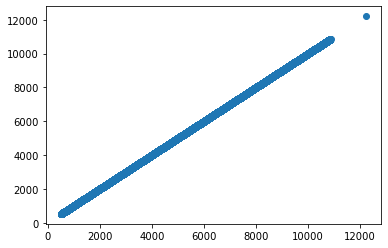

In [10]:
plt.plot(allr['x'],alli['x'],'o')
estimate_coef(allr['x'],alli['x'])

(-2.80019776255358e-08, 1.000000000007338)

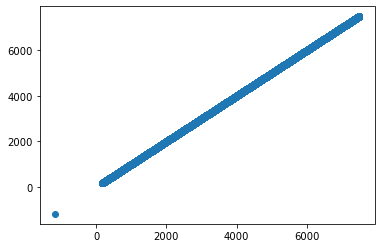

In [11]:
plt.plot(allr['y'],alli['y'],'o')
estimate_coef(allr['y'],alli['y'])

(0.0, 1.0)

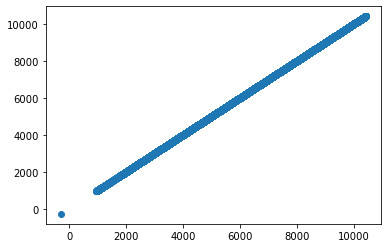

In [12]:
plt.plot(allr['z'],alli['z'],'o')
estimate_coef(allr['z'],alli['z'])